### Brown LHC ML Hackathon

dataset: https://archive.ics.uci.edu/ml/datasets/HIGGS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

path = '/Users/rizki/Documents/Projects/Brown_lhc_ml_hackathon/Higgs_classification/'
data_folder = 'data/'

all_data = path+data_folder+'HIGGS.csv'
signal = path+data_folder+'higgs-signal.csv'
bkg = path+data_folder+'higgs-bgk.csv'

all_df = pd.read_csv(all_data,header=None)

In [2]:

physics_columns=['lepton pT', 'lepton eta', 'lepton phi', 'missing energy magnitude', 'missing energy phi', 'jet 1 pt', 'jet 1 eta', 'jet 1 phi', 'jet 1 b-tag', 'jet 2 pt', 'jet 2 eta', 'jet 2 phi', 'jet 2 b-tag', 'jet 3 pt', 'jet 3 eta', 'jet 3 phi', 'jet 3 b-tag', 'jet 4 pt', 'jet 4 eta', 'jet 4 phi', 'jet 4 b-tag', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

all_df.columns =['label']+physics_columns

sig_df = all_df[all_df['label']==1]
bkg_df = all_df[all_df['label']==0]


In [3]:
print(all_df.shape)
all_df.head()

(11000000, 29)


,label,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [ ]:
## Train test split as instructed by organizer: test set --> last 500k of rows.

train_df = all_df.iloc[:all_df.shape[0]-500000]
test_df = all_df.iloc[all_df.shape[0]-500000:]

print (train_df.shape)
print (test_df.shape)

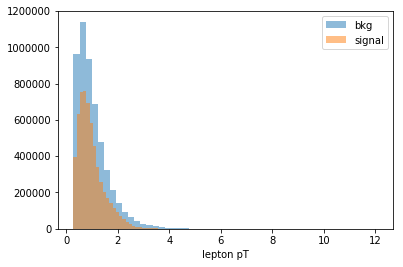

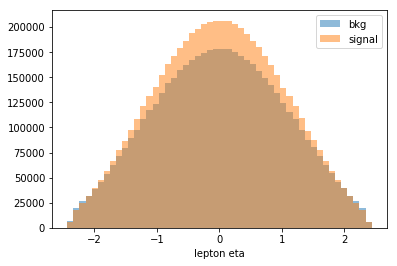

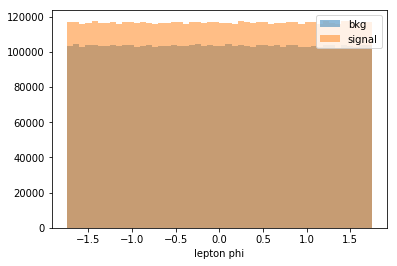

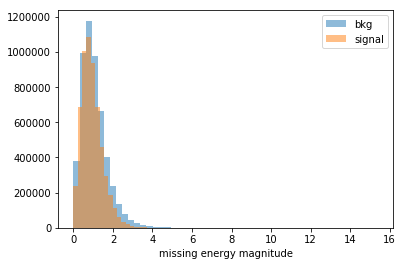

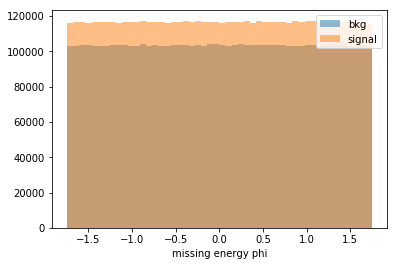

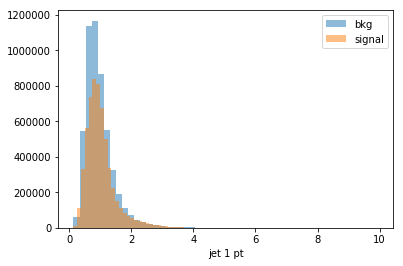

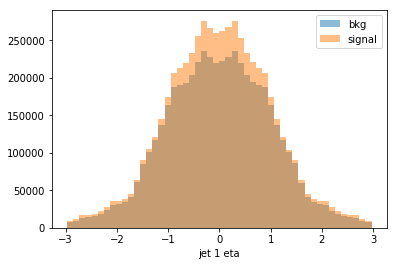

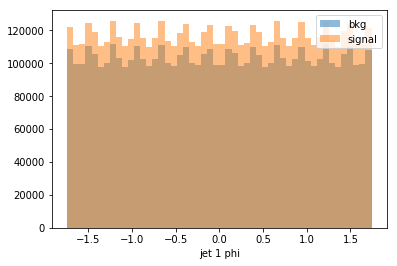

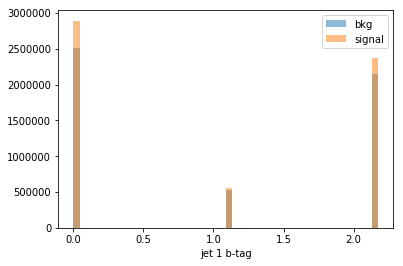

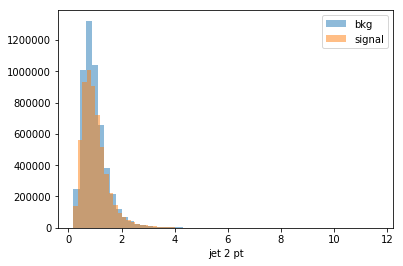

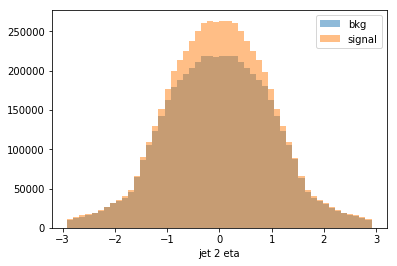

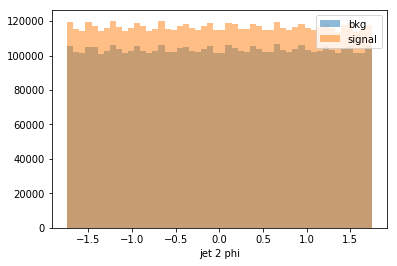

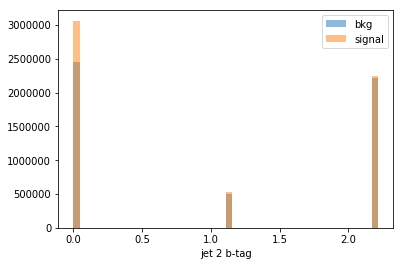

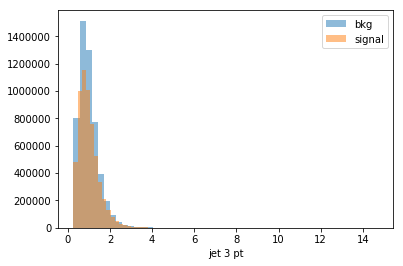

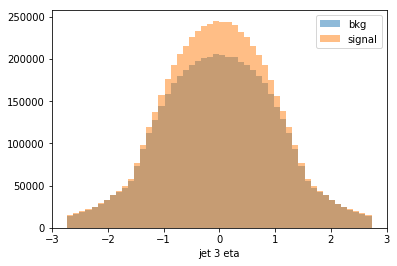

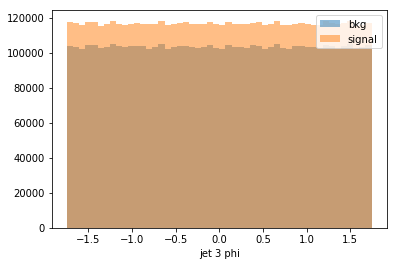

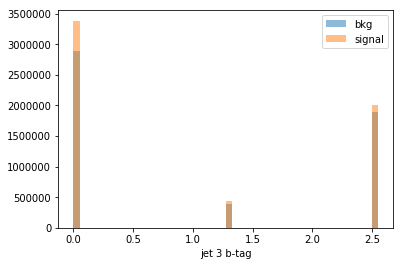

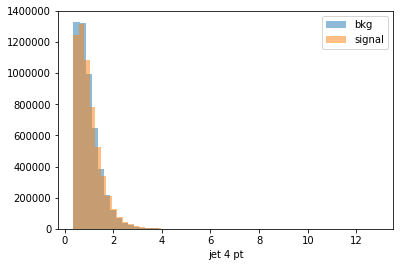

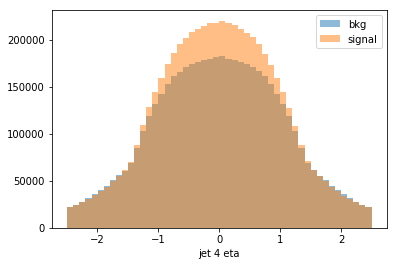

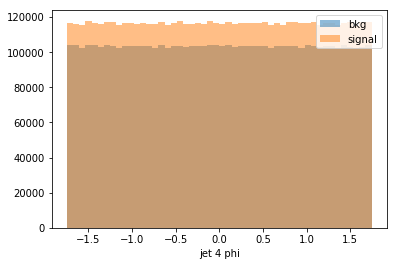

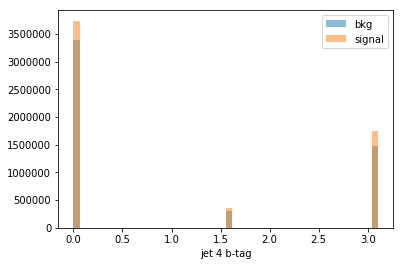

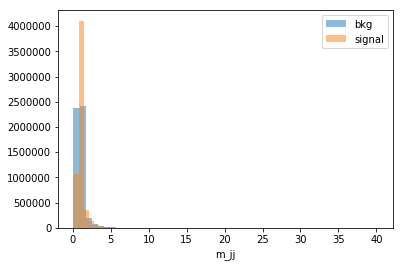

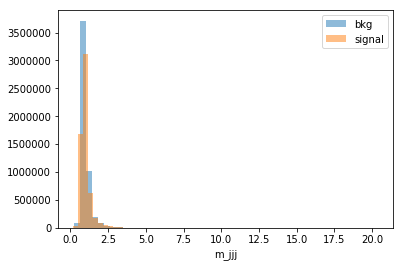

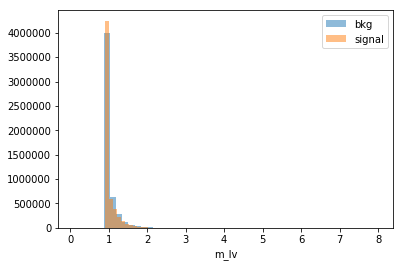

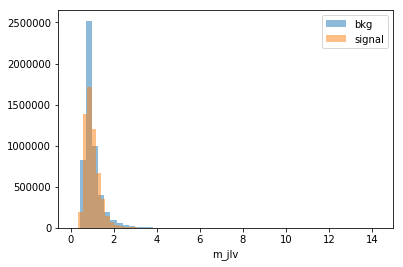

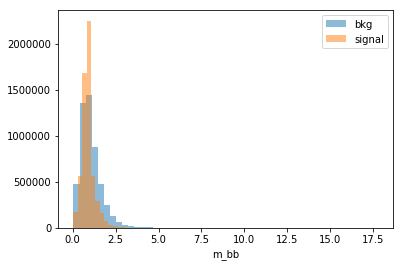

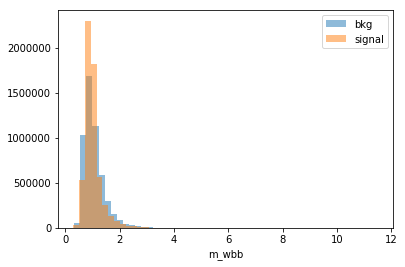

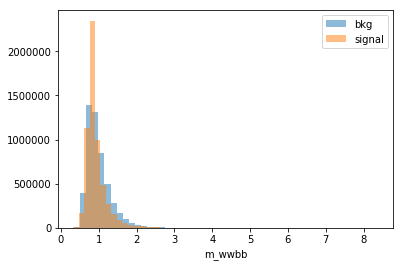

In [5]:
#Plot to have an idea what the features distribution look like

savePath = path+'plots/'
for i,feat in enumerate(physics_columns):
    fig_lepPt = plt.figure(i)
    plt.hist(bkg_df[feat],bins=50,alpha=0.5,label='bkg')
    plt.hist(sig_df[feat],bins=50,alpha=0.5,label='signal')
    plt.xlabel(feat)
    plt.legend(loc='upper right')
    #plt.savefig(savePath+feat+'.png')
    plt.show()

In [6]:
# Test validation split -- take only 500k trains samples. Plenty enough.

from sklearn.model_selection import train_test_split, cross_val_score, KFold

X_tr, X_val, y_tr, y_val = train_test_split(train_df[:100000].drop(['label'], axis=1), train_df[:100000]['label'], test_size=0.05, random_state=42)

/anaconda2/envs/lhc_ml_hackathon/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


Training until validation scores don't improve for 200 rounds.
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.834786	eval's auc: 0.816736
evals_result = 
Plot metrics recorded during training...


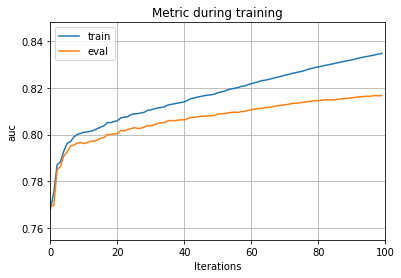

Plot feature importances...


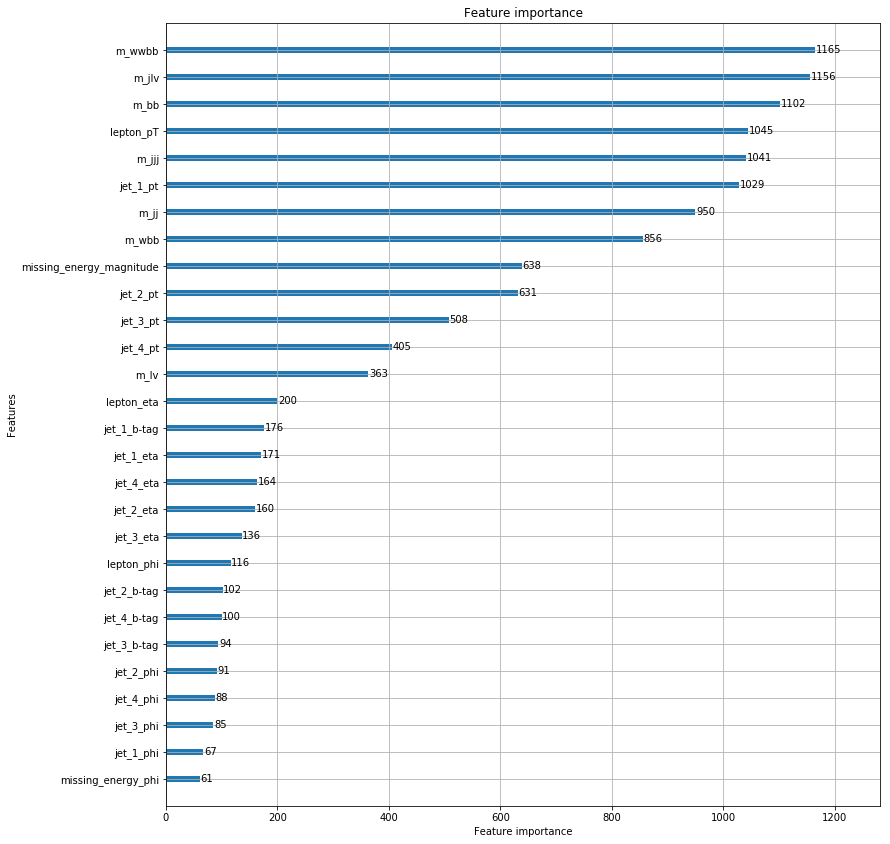

feature importance:
    1 m_wwbb : 1165
    2 m_jlv : 1156
    3 m_bb : 1102
    4 lepton_pT : 1045
    5 m_jjj : 1041
    6 jet_1_pt : 1029
    7 m_jj : 950
    8 m_wbb : 856
    9 missing_energy_magnitude : 638
    10 jet_2_pt : 631
    11 jet_3_pt : 508
    12 jet_4_pt : 405
    13 m_lv : 363
    14 lepton_eta : 200
    15 jet_1_b-tag : 176
    16 jet_1_eta : 171
    17 jet_4_eta : 164
    18 jet_2_eta : 160
    19 jet_3_eta : 136
    20 lepton_phi : 116
    21 jet_2_b-tag : 102
    22 jet_4_b-tag : 100
    23 jet_3_b-tag : 94
    24 jet_2_phi : 91
    25 jet_4_phi : 88
    26 jet_3_phi : 85
    27 jet_1_phi : 67
    28 missing_energy_phi : 61


In [7]:
# Boosted Decision Tree - LightGBM

import lightgbm as lgb

evals_result={}

lgb_train = lgb.Dataset(X_tr, label=y_tr)
lgb_test = lgb.Dataset(X_val, label=y_val)

lgb_params = {
               'feature_fraction': .75,
               'metric': 'auc',
               'nthread':4, 
               'min_data_in_leaf': 2**7, 
               'bagging_fraction': 0.75,#0.75 
               'learning_rate': 0.03, 
               'objective': 'cross_entropy', 
               'bagging_seed': 2**7, 
               'num_leaves': 2**7,
               'bagging_freq':1,
               'verbose':1,
              }

num_boost_round = 100
verbose_eval = num_boost_round/20
lgb_model = lgb.train(lgb_params, 
                  lgb_train,
                  valid_sets=[lgb_train, lgb_test],
                  valid_names=['train','eval'],
                  num_boost_round=num_boost_round,
                  evals_result=evals_result,
                  early_stopping_rounds=200,
                  verbose_eval=verbose_eval)

print ('evals_result = '),evals_result

print('Plot metrics recorded during training...')
ax = lgb.plot_metric(evals_result, metric='auc')
# if(saveplots):plt.savefig(saveFolder+"/"+"lgb_plot_metric_"+saveName+".pdf")
plt.show()

print('Plot feature importances...')
ax = lgb.plot_importance(lgb_model, max_num_features=X_val.shape[1])
ax.figure.set_size_inches(6.4*2,4.8*3)
# if(saveplots):plt.savefig(saveFolder+"/"+"lgb_plot_importance_"+saveName+".pdf")
plt.show()

print ('feature importance:')
sorted_index = np.argsort(lgb_model.feature_importance())
for i in range(len(lgb_model.feature_name())-1,0-1,-1):
    print (' '*3,(len(lgb_model.feature_name())-i), lgb_model.feature_name()[sorted_index[i]],':',lgb_model.feature_importance()[sorted_index[i]])

In [8]:

from sklearn.metrics import roc_auc_score

pred_lgb_tr = lgb_model.predict(X_tr)
print('Train set AUC using LightGBM is %f' % roc_auc_score(y_tr,pred_lgb_tr))
pred_lgb_val = lgb_model.predict(X_val)
print('Val set AUC using LightGBM is %f' % roc_auc_score(y_val, pred_lgb_val))

#Predict using test set.
pred_lgb_test = lgb_model.predict(test_df.drop(columns=['label']))
print('Test set AUC using LightGBM is %f' % roc_auc_score(test_df['label'], pred_lgb_test))


Train set AUC using LightGBM is 0.834786
Val set AUC using LightGBM is 0.816736
Test set AUC using LightGBM is 0.805975


In [10]:
#Simple DNN

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,CSVLogger,EarlyStopping
import tensorflow as tf

# create model
dnn_model = Sequential()
dnn_model.add(Dense(128, input_dim=28, activation='relu'))
dnn_model.add(Dense(64, activation='relu'))
dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dense(16, activation='relu'))
dnn_model.add(Dense(8, activation='relu'))
dnn_model.add(Dense(4, activation='relu'))
dnn_model.add(Dense(2, activation='relu'))
dnn_model.add(Dense(1, activation='sigmoid'))

# Compile model
dnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

#probably need to normalize input.

# Fit the model
dnn_model.fit(X_tr, y_tr, 
              epochs=100, 
              batch_size=256,
              shuffle=True,
              validation_split=0.1,
              callbacks=[early_stop]
             )

Using TensorFlow backend.


Train on 85500 samples, validate on 9500 samples
Epoch 1/100
85500/85500 [==============================] - 3s 39us/step - loss: 0.6710 - acc: 0.5893 - val_loss: 0.6521 - val_acc: 0.6352
Epoch 2/100
85500/85500 [==============================] - 2s 18us/step - loss: 0.6447 - acc: 0.6396 - val_loss: 0.6287 - val_acc: 0.6615
Epoch 3/100
85500/85500 [==============================] - 2s 19us/step - loss: 0.6232 - acc: 0.6619 - val_loss: 0.6148 - val_acc: 0.6743
Epoch 4/100
85500/85500 [==============================] - 2s 19us/step - loss: 0.6113 - acc: 0.6719 - val_loss: 0.6094 - val_acc: 0.6762
Epoch 5/100
85500/85500 [==============================] - 2s 20us/step - loss: 0.6024 - acc: 0.6789 - val_loss: 0.6054 - val_acc: 0.6775
Epoch 6/100
85500/85500 [==============================] - 2s 21us/step - loss: 0.5967 - acc: 0.6835 - val_loss: 0.5990 - val_acc: 0.6863
Epoch 7/100
85500/85500 [==============================] - 2s 21us/step - loss: 0.5926 - acc: 0.6861 - val_loss: 0.5962 - v

In [11]:
# evaluate the model
scores = dnn_model.evaluate(X_tr, y_tr)
print("\n%s: %.2f%%" % (dnn_model.metrics_names[1], scores[1]*100))

95000/95000 [==============================] - 3s 36us/step

acc: 72.62%


In [12]:
dnn_predictions_tr = dnn_model.predict(X_tr)
print('Train set AUC using Simple DNN is %f' % roc_auc_score(y_tr,dnn_predictions_tr))
dnn_predictions_val = dnn_model.predict(X_val)
print('Val set AUC using Simple DNN is %f' % roc_auc_score(y_val, dnn_predictions_val))

Train set AUC using Simple DNN is 0.808073
Val set AUC using Simple DNN is 0.769413


In [13]:
dnn_predictions_test = dnn_model.predict(test_df.drop(columns=['label']))
print('Test set AUC using Simple DNN is %f' % roc_auc_score(test_df['label'], dnn_predictions_test))

Test set AUC using Simple DNN is 0.764760


In [14]:
# Stack BDT and DNN with LinReg Meta layer

pred_lgb_tr_s = pd.Series(pred_lgb_tr)
dnn_predictions_tr_s = pd.Series(dnn_predictions_tr.ravel())
pred_tr_df = pd.DataFrame({'lgb':pred_lgb_tr_s,'dnn':dnn_predictions_tr_s})

pred_lgb_val_s = pd.Series(pred_lgb_val)
dnn_predictions_val_s = pd.Series(dnn_predictions_val.ravel())
pred_val_df = pd.DataFrame({'lgb':pred_lgb_val_s,'dnn':dnn_predictions_val_s})

pred_lgb_test_s = pd.Series(pred_lgb_test)
dnn_predictions_test_s = pd.Series(dnn_predictions_test.ravel())
pred_test_df = pd.DataFrame({'lgb':pred_lgb_test_s,'dnn':dnn_predictions_test_s})

In [15]:
from sklearn.linear_model import LogisticRegression, LinearRegression

linr_model = LinearRegression()

In [16]:
linr_model.fit(pred_tr_df, y_tr)
pred_linr_tr = linr_model.predict(pred_tr_df)
print('Train set AUC using Meta LinReg is %f' % roc_auc_score(y_tr,pred_linr_tr))

Train set AUC using Meta LinReg is 0.841923


In [17]:
linr_model.fit(pred_val_df, y_val)
pred_linr_val = linr_model.predict(pred_val_df)
print('Val set AUC using Meta LinReg is %f' % roc_auc_score(y_val,pred_linr_val))

Val set AUC using Meta LinReg is 0.818937


In [18]:
linr_model.fit(pred_test_df, test_df['label'])
pred_linr_test = linr_model.predict(pred_test_df)
print('Test set AUC using Meta LinReg is %f' % roc_auc_score(test_df['label'],pred_linr_test))

Test set AUC using Meta LinReg is 0.809001
